In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline
#plt.style.use('seaborn')

from pandas import *
from pandas.io.parsers import read_csv

In [2]:
lancs = read_csv('lancs-es.csv', index_col=False, header=None)
mwt2 = read_csv('mwt2-es.csv', index_col=False, header=None)
cern = read_csv('cern-es.csv', index_col=False, header=None)
bnl = read_csv('bnl_es.csv', index_col=False, header=None)
#lancs.describe().loc[['count','sum','mean','std']]
#mwt2.describe().loc[['count','sum','mean','std']]
#cern.describe().loc[['count','sum','mean','std']]
len(lancs)
len(mwt2)
len(cern)

623717

In [3]:
cs=cern[(cern<5e6)].dropna()
cs.sum()/1e9

0    304.032389
dtype: float64

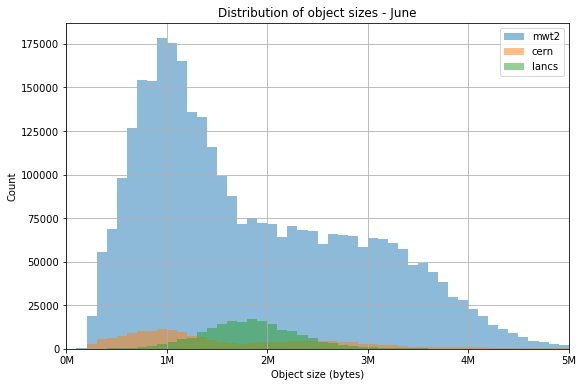

In [8]:
def objsize(x, pos):
    'The two args are the value and tick position'
    return '{:1.0f}M'.format(x*1e-6)
fig, ax = plt.subplots(figsize=(9, 6))
bins=range(0, 300000000, 100000)
mwt2.hist(ax=ax, bins=bins, label=['mwt2'], alpha=0.5)
cern.hist(ax=ax, bins=bins, label=['cern'], alpha=0.5)
lancs.hist(ax=ax, bins=bins, label=['lancs'], alpha=0.5)
#bnl.hist(ax=ax, bins=bins, label=['bnl'], alpha=0.5)
ax.set(title='Distribution of object sizes - June', xlabel='Object size (bytes)', ylabel='Count')
formatter = FuncFormatter(objsize)
ax.set_xlim([0, 5e6])
#ax.set_yscale('log')
ax.xaxis.set_major_formatter(formatter)
ax.legend().set_visible(True)
